In [1]:
import pandas as pd
import numpy as np

In [2]:
Paris_1 = pd.read_csv('Coding_Paris_Week1.csv')
Paris_2 = pd.read_csv('Coding_Paris_Week2.csv')
Paris_3 = pd.read_csv('Coding_Paris_Week3.csv')
Paris_4 = pd.read_csv('Coding_Paris_Week4.csv')
Paris_5 = pd.read_csv('Coding_Paris_Week5.csv')
Shawn_1 = pd.read_csv('Coding_Shawn_Week1.csv')
Shawn_2 = pd.read_csv('Coding_Shawn_Week2.csv')
Shawn_3 = pd.read_csv('Coding_Shawn_Week3.csv')
Shawn_4 = pd.read_csv('Coding_Shawn_Week4.csv')
Shawn_5 = pd.read_csv('Coding_Shawn_Week5.csv')
Tianli_1 = pd.read_csv('Coding_Tianli_Week1.csv')
Tianli_2 = pd.read_csv('Coding_Tianli_Week2.csv')
Tianli_3 = pd.read_csv('Coding_Tianli_Week3.csv')
Tianli_4 = pd.read_csv('Coding_Tianli_Week4.csv')
Tianli_5 = pd.read_csv('Coding_Tianli_Week5.csv')
# Combine all the data frames into one
combined_df = pd.concat([
    Paris_1, Paris_2, Paris_3, Paris_4, Paris_5,
    Shawn_1, Shawn_2, Shawn_3, Shawn_4, Shawn_5,
    Tianli_1, Tianli_2, Tianli_3, Tianli_4, Tianli_5
], ignore_index=True)

combined_df['Sentiment'] = combined_df['Sentiment'].astype(int)



# Check the combined data frame
print(combined_df)

                                                   Tweet  Sentiment
0      RT @biancale_monash ATTN: Aus women interested...          3
1      The future will be full of lab grown meat: htt...          1
2      The Future Of Meat: 45 In Vitro Meat Recipes Y...          4
3      Some makers of lab-grown meat have adopted a c...          3
4                Lab grown meat doesn’t sit well with me          2
...                                                  ...        ...
22970  I've unexpectedly ended up with David Lewis on...          3
22971      cheap cultivated meat https://t.co/hsXLscDaVS          3
22972  @BobsBlog I mean to be clear, it depends exact...          3
22973  The market for cultured meat is no joke (prese...          3
22974  @guardiannews LAB-GROWN MEAT HITS A MAJOR MILE...          3

[22975 rows x 2 columns]


In [3]:
train_df = combined_df.sample(frac=0.8, random_state=2024)

# 剩下20%作为验证数据
validation_df = combined_df.drop(train_df.index)

In [4]:
validation_df = validation_df.reset_index(drop=True)

In [5]:
import gensim
import gensim.corpora as corpora
import re
b = []
for i,u in validation_df.iterrows():
    a = []
    word =''
    for words in str(u['Tweet']).split(): #tokenization
        if '@' not in words: #remove @users
            words = words.replace('#','') #remove hashtag symbol
            if '#' not in words:
                if 'http' not in words: #remove URLs
                    if'&amp' not in words: #remove symbol
                        if 'RT' not in words:
                            word += (words+' ')
    doc = ''
    for token in word.split():
        token = token.lower()
        doc += (token+' ')
    b.append(doc)
validation_df['processed']=[i for i in b]

In [7]:
validation_df

,Tweet,Sentiment,processed
0,@csimpsyo @Tbogin @jonlovett Cultured meat,3,cultured meat
1,RT @ndonyourtable What's the difference betwee...,3,what's the difference between plant-based and ...
2,#Technology #Tech Lab-Grown Meat Is Coming htt...,3,technology tech lab-grown meat is coming
3,This year is the first time cultivated meat ha...,3,this year is the first time cultivated meat ha...
4,"RT @NewHarvestOrg 🍗and @UmaValeti, who co-foun...",3,🍗and who co-founded the 1st cell-based meat co...
...,...,...,...
4590,@Joseph_Plant What goes into lab grown meat? I...,2,what goes into lab grown meat? it’s not natura...
4591,Google Funding Lab Grown Meat… No Animals Kill...,1,google funding lab grown meat… no animals kill...
4592,RT @Orbyne #LSEForum cultured meat avoids the ...,1,lseforum cultured meat avoids the use of antib...
4593,@MusadADroid @AuthorGusPegel The answer would ...,4,the answer would be to reduce breeding program...


In [6]:
# Import VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)

    #print(sentence) 
    #print("Overall sentiment dictionary is : ", sentiment_dict)
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    #print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        #print("Positive")
        return 'Positive', sentiment_dict['compound']
 
    elif sentiment_dict['compound'] <= - 0.05 :
        #print("Negative")
        return 'Negative', sentiment_dict['compound']
 
    else :
        #print("Neutral")
        #print(sentiment_dict['compound'])
        return 'Neutral', sentiment_dict['compound']

In [8]:
import time
start = time.time()
sentiment_ = []
for i, v in validation_df.iterrows():
    sentiment_.append(sentiment_scores(v['processed']))
end = time.time()
print('time cost to process tweets:', end-start)

time cost to process tweets: 32.14846897125244


In [9]:
sentiment_0 = []
sentiment_1 = []
for i in range(len(sentiment_)):
    sentiment_0.append(sentiment_[i][0])
    sentiment_1.append(sentiment_[i][1])

validation_df['Sentiment_VADER_processed'] = [i for i in sentiment_0]
validation_df['sentiment score_processed'] = [i for i in sentiment_1]

In [10]:
sentiment_mapping = {
    "Positive": 1,
    "Negative": 2,
    "Neutral": 3
}


validation_df['sentiment_VADER_processed'] = validation_df['Sentiment_VADER_processed'].replace(sentiment_mapping)

In [11]:
import time
start = time.time()
sentiment_ = []

# Here we are analyzing the original tweet (without pre-processing)
for i, v in validation_df.iterrows():
    sentiment_.append(sentiment_scores(v['Tweet']))
end = time.time()
print('time cost to process tweets:', end-start)

sentiment_0 = []
sentiment_1 = []
for i in range(len(sentiment_)):
    sentiment_0.append(sentiment_[i][0])
    sentiment_1.append(sentiment_[i][1])

validation_df['Sentiment_VADER'] = [i for i in sentiment_0]
validation_df['sentiment score'] = [i for i in sentiment_1]


validation_df['sentiment_VADER'] = validation_df['Sentiment_VADER'].replace(sentiment_mapping)

time cost to process tweets: 32.02085518836975


In [12]:
sampled = validation_df.loc[validation_df['Sentiment']!= 4]

In [13]:
sampled

,Tweet,Sentiment,processed,Sentiment_VADER_processed,sentiment score_processed,sentiment_VADER_processed,Sentiment_VADER,sentiment score,sentiment_VADER
0,@csimpsyo @Tbogin @jonlovett Cultured meat,3,cultured meat,Neutral,0.0000,3,Neutral,0.0000,3
1,RT @ndonyourtable What's the difference betwee...,3,what's the difference between plant-based and ...,Positive,0.6249,1,Positive,0.6588,1
2,#Technology #Tech Lab-Grown Meat Is Coming htt...,3,technology tech lab-grown meat is coming,Neutral,0.0000,3,Neutral,0.0000,3
3,This year is the first time cultivated meat ha...,3,this year is the first time cultivated meat ha...,Positive,0.2263,1,Positive,0.2263,1
4,"RT @NewHarvestOrg 🍗and @UmaValeti, who co-foun...",3,🍗and who co-founded the 1st cell-based meat co...,Positive,0.4939,1,Positive,0.4939,1
...,...,...,...,...,...,...,...,...,...
4589,Cesagen's Neil Stephens in a fascinating Scien...,3,cesagen's neil stephens in a fascinating scien...,Positive,0.5423,1,Positive,0.5423,1
4590,@Joseph_Plant What goes into lab grown meat? I...,2,what goes into lab grown meat? it’s not natura...,Negative,-0.2755,2,Negative,-0.2755,2
4591,Google Funding Lab Grown Meat… No Animals Kill...,1,google funding lab grown meat… no animals kill...,Positive,0.3378,1,Positive,0.3378,1
4592,RT @Orbyne #LSEForum cultured meat avoids the ...,1,lseforum cultured meat avoids the use of antib...,Negative,-0.1779,2,Negative,-0.1779,2


## VADER

In [14]:
df = sampled
df['Sentiment'] = df['Sentiment'].astype(int)
df['sentiment'] = df['sentiment_VADER'].astype(int)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(df['Sentiment'], df['sentiment'])
precision = precision_score(df['Sentiment'], df['sentiment'], average='weighted')
recall = recall_score(df['Sentiment'], df['sentiment'], average='weighted')
f1 = f1_score(df['Sentiment'], df['sentiment'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.48909171861086376
Precision: 0.6375344630135539
Recall: 0.48909171861086376
F1 Score: 0.5170779798900761


In [15]:
df = sampled
df['Sentiment'] = df['Sentiment'].astype(int)
df['sentiment'] = df['sentiment_VADER_processed'].astype(int)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(df['Sentiment'], df['sentiment'])
precision = precision_score(df['Sentiment'], df['sentiment'], average='weighted')
recall = recall_score(df['Sentiment'], df['sentiment'], average='weighted')
f1 = f1_score(df['Sentiment'], df['sentiment'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.48909171861086376
Precision: 0.6378265481421427
Recall: 0.48909171861086376
F1 Score: 0.5172255327991434


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


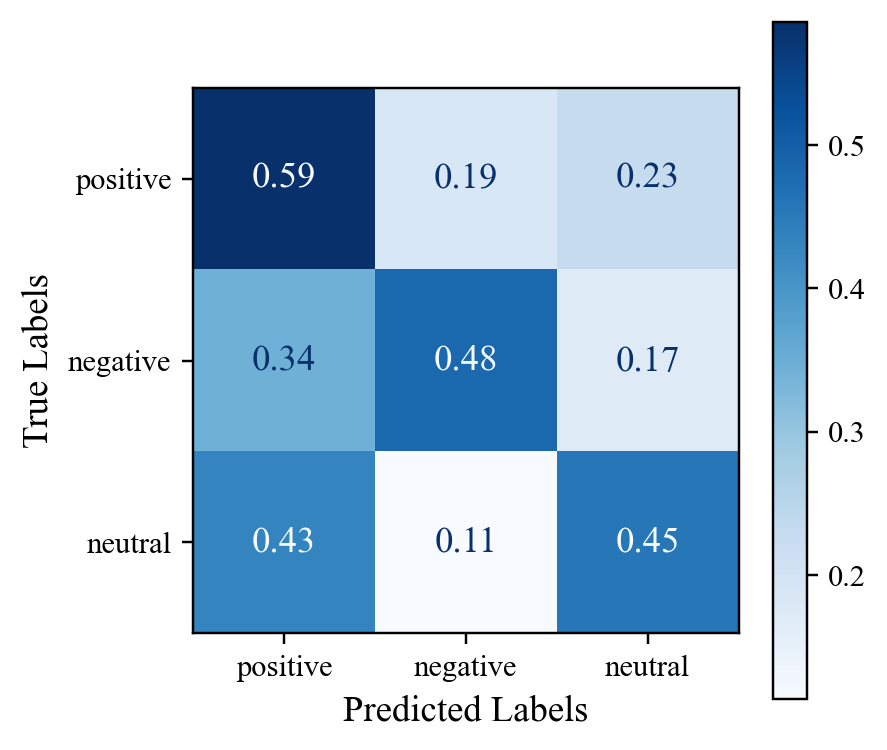

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df['sentiment'] = df['sentiment_VADER'].astype(int)
# Define the sentiment labels
label_mapping = {0: 'positive', 1: 'negative', 2: 'neutral'}
sentiment_labels = [label_mapping[i] for i in range(3)]

# Generate the normalized confusion matrix by rows
conf_matrix = confusion_matrix(df['Sentiment'], df['sentiment'], normalize='true')

# Create a ConfusionMatrixDisplay object for visualization with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sentiment_labels)

# Plot the normalized confusion matrix
plt.rc('font', family='Times New Roman')  # Set the font to Times New Roman
fig, ax = plt.subplots(figsize=(4, 4), dpi=220)  # Increase figure size and resolution
disp.plot(cmap='Blues', ax=ax, values_format='.2f')  # Format numbers as percentages with two decimals

# Customize the text size of numbers in the matrix
for text in disp.text_.ravel():
    text.set_fontsize(12)  # Increase font size of numbers in the matrix

# Set titles and labels with the desired font
plt.xlabel("Predicted Labels", fontname='Times New Roman', fontsize=12)
plt.ylabel("True Labels", fontname='Times New Roman', fontsize=12)
plt.show()